In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

In [7]:
dataset_path = "C:\Open Code\Pest and Disease"

train_dir = os.path.join(dataset_path, 'train_set')
test_dir = os.path.join(dataset_path, 'test_set')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [9]:
data_path = 'C:\Open Code\Pest and Disease\Dataset'
classes = ['Cashew', 'Cassava', 'Maize', 'Tomato']


def dataset_struct():
    for crop in classes:
        class_dir = os.path.join(data_path, crop) #Class divison
        for split in ['train_set', 'test_set']:
            split_path = os.path.join(class_dir, split) # path to class/split
            if not os.path.exists(split_path):
                print(f"{split_path} not found, aborting dataset")
                return

            for sub_class in os.listdir(split_path):
                sub_class_path = os.path.join(split_path, sub_class)
                if os.path.isdir(sub_class_path):
                    # name of folder in restructured dataset
                    class_name = f"{sub_class.replace(' ', '_')}_{crop.lower()}"
                    new_dir = train_dir if 'train' in split else test_dir
                    new_path = os.path.join(new_dir, class_name)
                    if os.path.exists(new_path):
                        print(f"{new_path} exists")
                        continue
                    # Move the directory
                    shutil.move(sub_class_path, new_path)

    print("Dataset Restructed")

dataset_struct()

Dataset Restructed


In [10]:
train_data = ImageDataGenerator(rescale=1.0/255) 
test_data = ImageDataGenerator(rescale=1.0/255)


train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'    
)

test_generator = test_data.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found in the dataset:", train_generator.class_indices)

# Do not change this code

Found 74317 images belonging to 22 classes.
Found 24981 images belonging to 22 classes.
Classes found in the dataset: {'anthracnose_cashew': 0, 'bacterial_blight_cassava': 1, 'brown_spot_cassava': 2, 'fall_armyworm_maize': 3, 'grasshoper_maize': 4, 'green_mite_cassava': 5, 'gumosis_cashew': 6, 'healthy_cashew': 7, 'healthy_cassava': 8, 'healthy_maize': 9, 'healthy_tomato': 10, 'leaf_beetle_maize': 11, 'leaf_blight_maize': 12, 'leaf_blight_tomato': 13, 'leaf_curl_tomato': 14, 'leaf_miner_cashew': 15, 'leaf_spot_maize': 16, 'mosaic_cassava': 17, 'red_rust_cashew': 18, 'septoria_leaf_spot_tomato': 19, 'streak_virus_maize': 20, 'verticulium_wilt_tomato': 21}


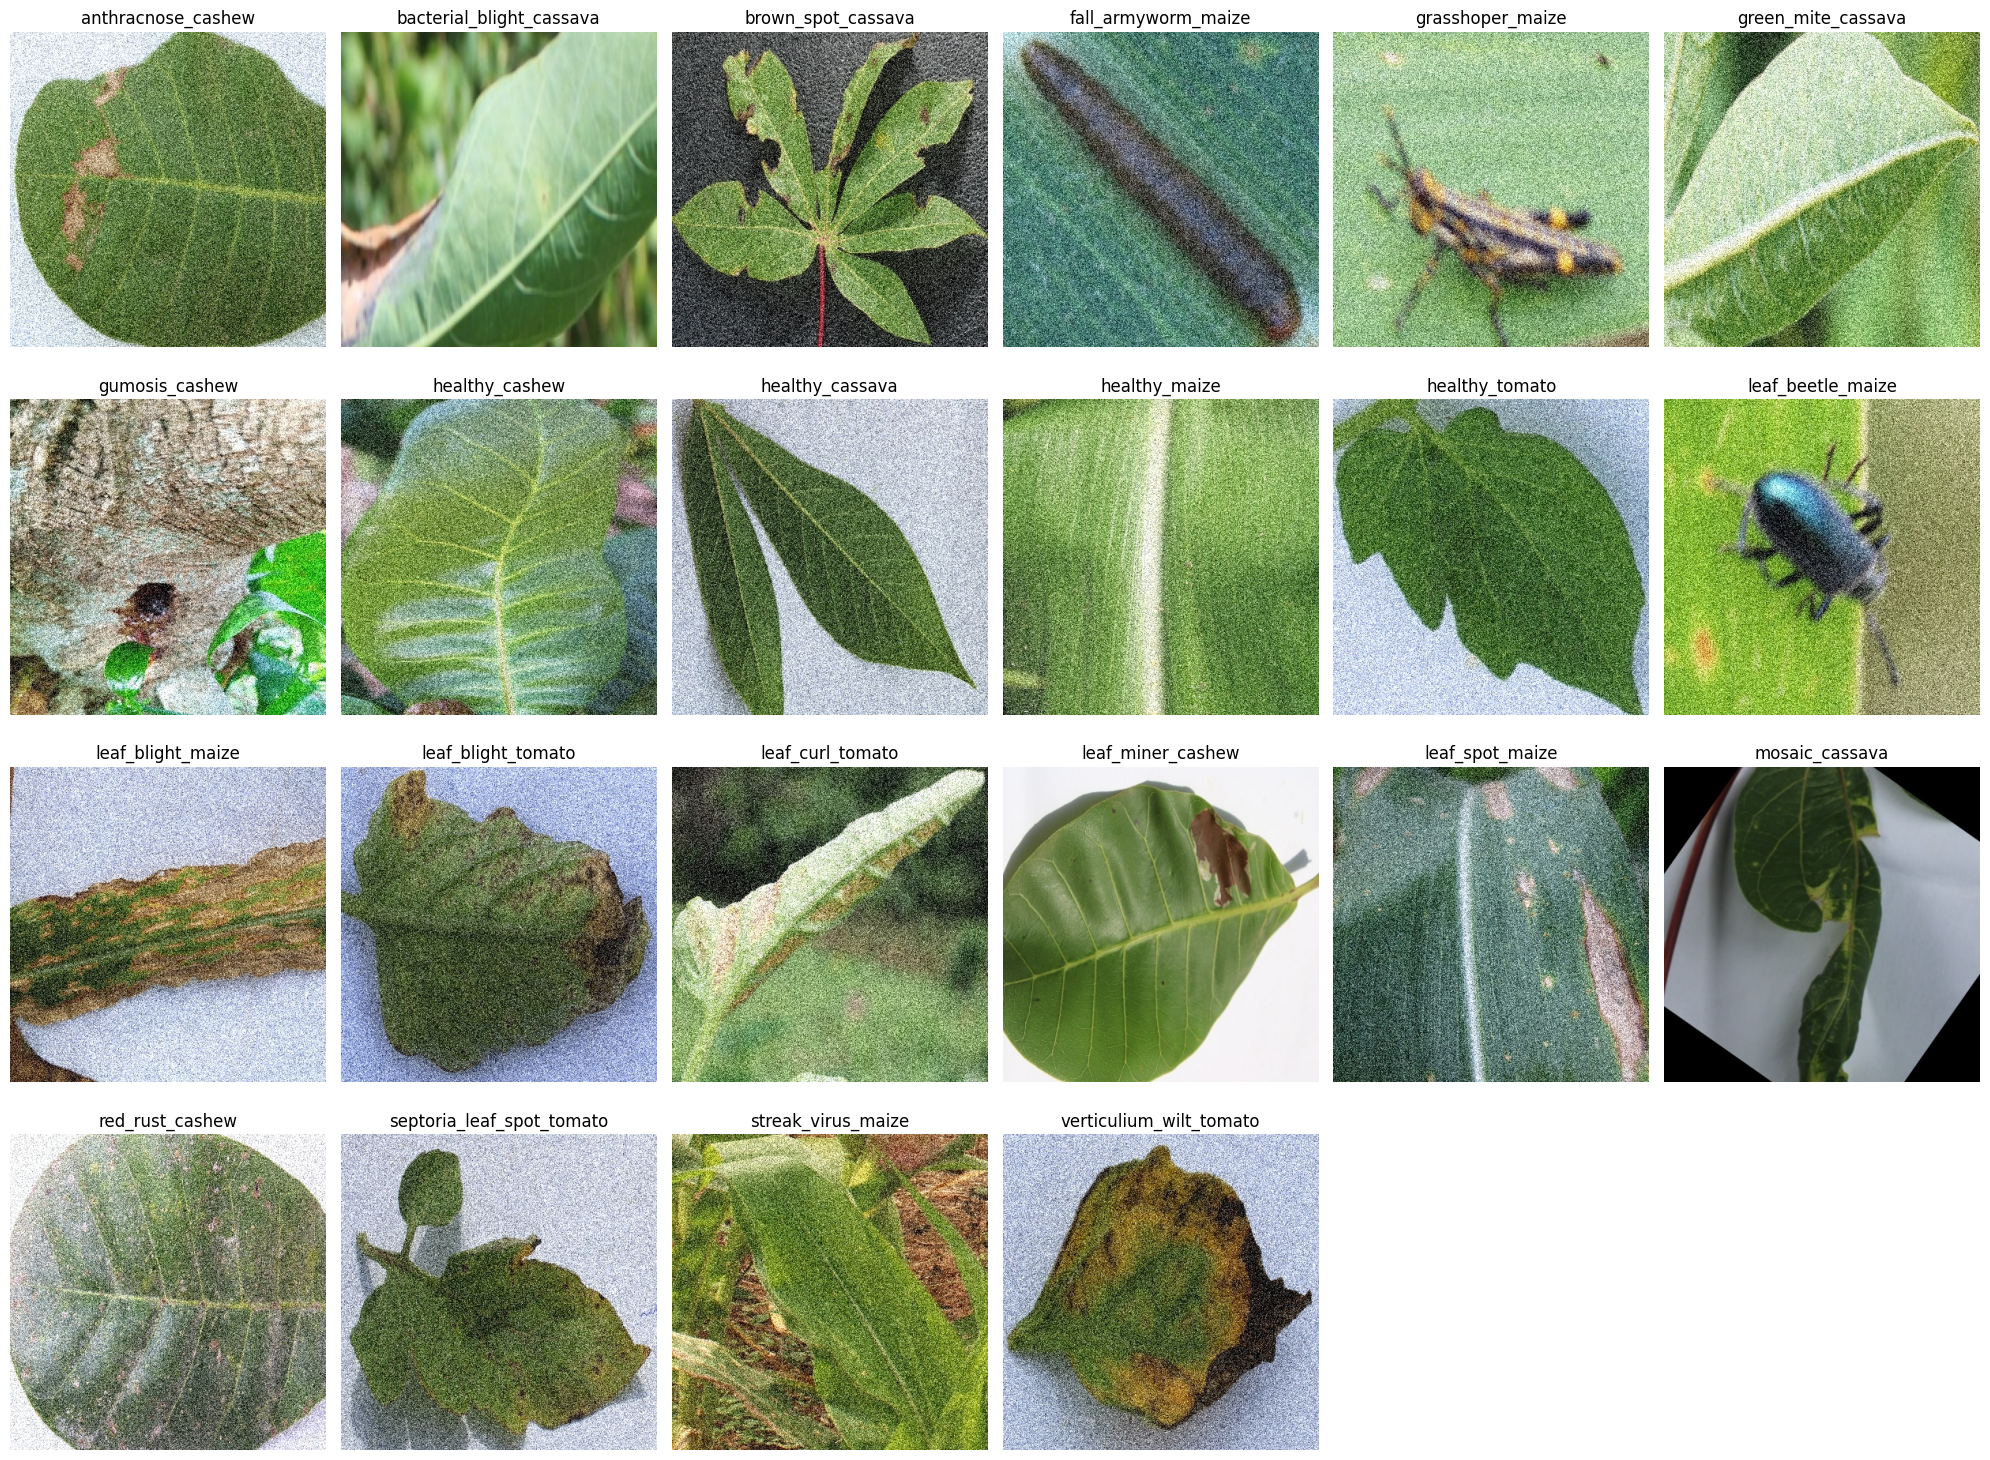

In [13]:
# Write the code to display one image of all the 22 classes.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

classes = train_generator.class_indices.keys()
sample_images = []

# Collect one sample image from each class
for cls in classes:
    class_dir = os.path.join(train_dir, cls)
    sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    sample_images.append((cls, sample_image_path))

# Plot each class's image
plt.figure(figsize=(20, 15))
for idx, (cls, img_path) in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(4, 6, idx + 1)  # 22 classes; 4 rows x 6 columns layout
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()